## CS 445: Computational Photography

## Final Group Project: Algorithmic Basketball Detection via Segmentation

TODO: 
- Add more data and use extract_frames() to fulfill the proposed number of images and videos from each person
- Find frames that work with our detection function from said new videos 
- Find unsuccessful frames to show the challenges of our method (when basketball is in players' hand, if there is not a lot of motion from frame to frame, false positive detection of faces, etc.)
- Finish canny edge innovation part

### Week 1: Compile Data

In [1]:
# Function to extract frames from downloaded clip or highlight videos
import cv2
import numpy as np
from pathlib import Path
import os

def extract_frames(video_path, output_dir, frames_per_second=60):
    """
    Extract frames from video at specified temporal rate

    Args:
        video_path: Path to input video
        output_dir: Directory to save frames
        frames_per_second: Number of frames to extract per second of video
    """
    Path(output_dir).mkdir(exist_ok=True)

    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        raise ValueError(f"Could not open video: {video_path}")

    # Get video properties
    fps = int(cap.get(cv2.CAP_PROP_FPS))
    sample_rate = int(fps / frames_per_second)

    frame_count = 0
    saved_count = 0

    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_count % sample_rate == 0:
            output_path = os.path.join(output_dir, f"frame_{saved_count:04d}.jpg")
            cv2.imwrite(output_path, frame)
            saved_count += 1

            if saved_count % 10 == 0:
                print(f"Saved {saved_count} frames...")

        frame_count += 1

    cap.release()
    print(f"Extraction complete. Processed {frame_count} frames, saved {saved_count} frames")

# Example usage, don't run again to avoid overwriting
# video_path = "data/basketball-free-throws-urichmond.mp4"
# output_dir = "data/basketball-free-throws-urichmond-frames/"
# extract_frames(video_path, output_dir, frames_per_second=20)

In [164]:
video_path = "data/Suns-Warriors-11-30-24-KD3Pt.mp4"
output_dir = "data/Suns-Warriors-11-30-24-KD3Pt-frames/"
extract_frames(video_path, output_dir, frames_per_second=30)

Saved 10 frames...
Saved 20 frames...
Saved 30 frames...
Saved 40 frames...
Saved 50 frames...
Saved 60 frames...
Saved 70 frames...
Saved 80 frames...
Saved 90 frames...
Saved 100 frames...
Saved 110 frames...
Saved 120 frames...
Saved 130 frames...
Saved 140 frames...
Saved 150 frames...
Saved 160 frames...
Saved 170 frames...
Saved 180 frames...
Saved 190 frames...
Saved 200 frames...
Saved 210 frames...
Saved 220 frames...
Saved 230 frames...
Saved 240 frames...
Saved 250 frames...
Saved 260 frames...
Saved 270 frames...
Saved 280 frames...
Saved 290 frames...
Saved 300 frames...
Saved 310 frames...
Saved 320 frames...
Saved 330 frames...
Saved 340 frames...
Extraction complete. Processed 681 frames, saved 341 frames


In [165]:
# TODO: Use the extract_frames function to extract frames from additional videos
# At least 2-3 clips from Elliot, Selina, Evan 
# - this way we'd each easily be able to find 10 frames that work and do not work for reporting results 

### Week 2-3: Ball Detection

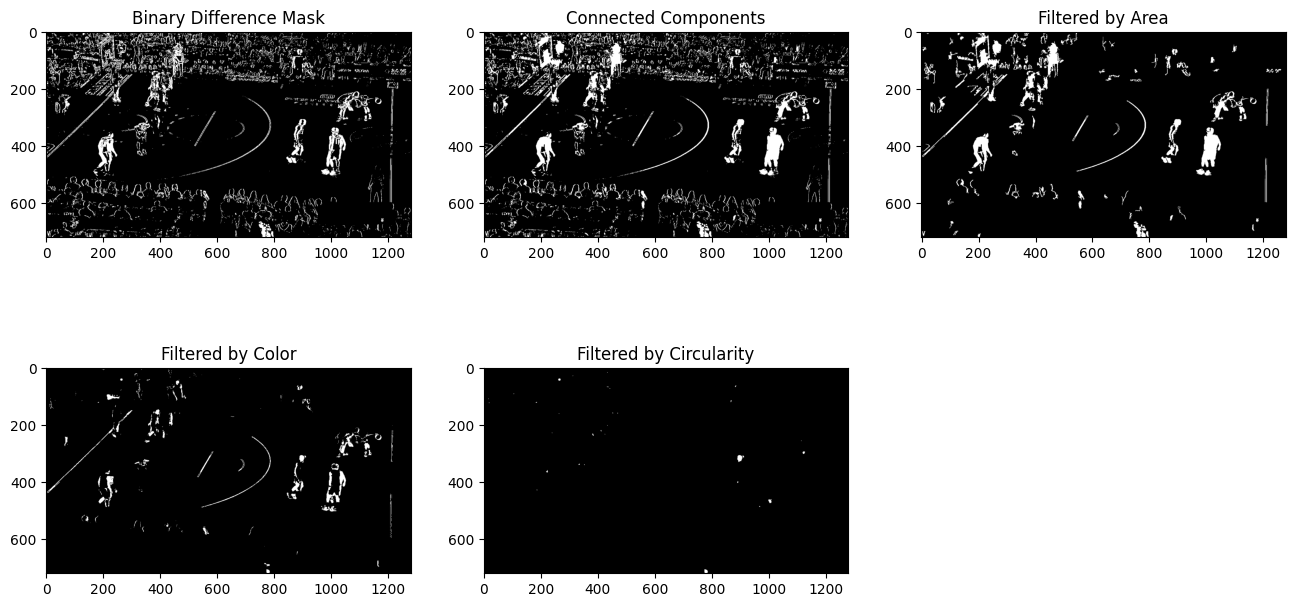

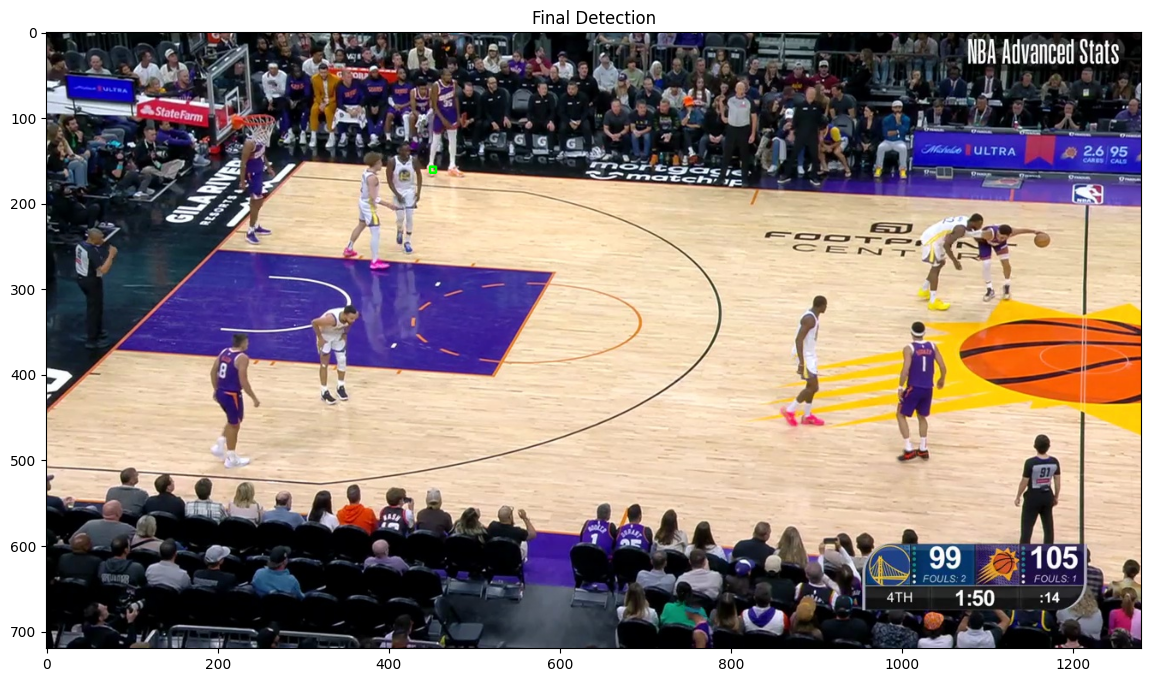

In [ ]:
### OLD CODE -- Earlier attempt (Dec 10, 5PM) ### Saved for reference

# import matplotlib.pyplot as plt 
# import cv2
# import numpy as np 

# def detect_basketball_with_visualization(frame1, frame2):
#     # binary difference image
#     diff = cv2.absdiff(frame1, frame2)
#     gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
#     _, binary_diff = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

#     plt.figure(figsize=(16, 8))
#     plt.subplot(2, 3, 1)
#     plt.imshow(binary_diff, cmap='gray')
#     plt.title('Binary Difference Mask')

#     # cluster connected regions
#     contours, _ = cv2.findContours(binary_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#     clustered_mask = np.zeros_like(binary_diff)
#     cv2.drawContours(clustered_mask, contours, -1, 255, -1)

#     plt.subplot(2, 3, 2)
#     plt.imshow(clustered_mask, cmap='gray')
#     plt.title('Connected Components')

#     # filter by area 
#     min_area = 50
#     area_filtered_mask = np.zeros_like(clustered_mask)
    
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         if area >= min_area:
#             cv2.drawContours(area_filtered_mask, [contour], -1, 255, -1)

#     plt.subplot(2, 3, 3)
#     plt.imshow(area_filtered_mask, cmap='gray')
#     plt.title('Filtered by Area')

#     # filter by HSV color 
#     hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
    
#     # brown mask for frame1 using paper's range (H in [0,60])
#     brown_mask = cv2.inRange(hsv, (0, 60, 60), (60, 255, 255))
    
#     # combine area and color masks
#     combined_mask = cv2.bitwise_and(area_filtered_mask, brown_mask)

#     plt.subplot(2, 3, 4)
#     plt.imshow(combined_mask, cmap='gray')
#     plt.title('Filtered by Color')

#     # filter by circularity (T3 = 0.2)
#     circularity_filtered_mask = np.zeros_like(combined_mask)
#     best_candidate = None
#     best_circularity_diff = float('inf')

#     contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     for contour in contours:
#         area = cv2.contourArea(contour)
#         perimeter = cv2.arcLength(contour, True)
#         if perimeter == 0:
#             continue

#         circularity = (4 * np.pi * area) / (perimeter ** 2)
#         circularity_diff = abs(circularity - 1)
        
#         if circularity_diff <= 0.5:
#             cv2.drawContours(circularity_filtered_mask, [contour], -1, 255, -1)
#             if circularity_diff < best_circularity_diff:
#                 best_circularity_diff = circularity_diff
#                 best_candidate = contour

#     plt.subplot(2, 3, 5)
#     plt.imshow(circularity_filtered_mask, cmap='gray')
#     plt.title('Filtered by Circularity')

#     # final detection result
#     result = frame2.copy()
#     if best_candidate is not None:
#         x, y, w, h = cv2.boundingRect(best_candidate)
#         padding = 2
#         cv2.rectangle(result,
#                      (max(0, x - padding), max(0, y - padding)),
#                      (min(result.shape[1], x + w + padding),
#                       min(result.shape[0], y + h + padding)),
#                      (0, 255, 0), 2)

#     return result, best_candidate

# frame1_path = "data/Suns-Warriors-11-30-24-KD3Pt-frames/frame_0001.jpg"
# frame1 = cv2.imread(frame1_path)
# frame2_path = "data/Suns-Warriors-11-30-24-KD3Pt-frames/frame_0002.jpg"
# frame2 = cv2.imread(frame2_path)

# result, _ = detect_basketball_with_visualization(frame1, frame2)
# plt.figure(figsize=(16, 8))
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.title('Final Detection')
# plt.show()

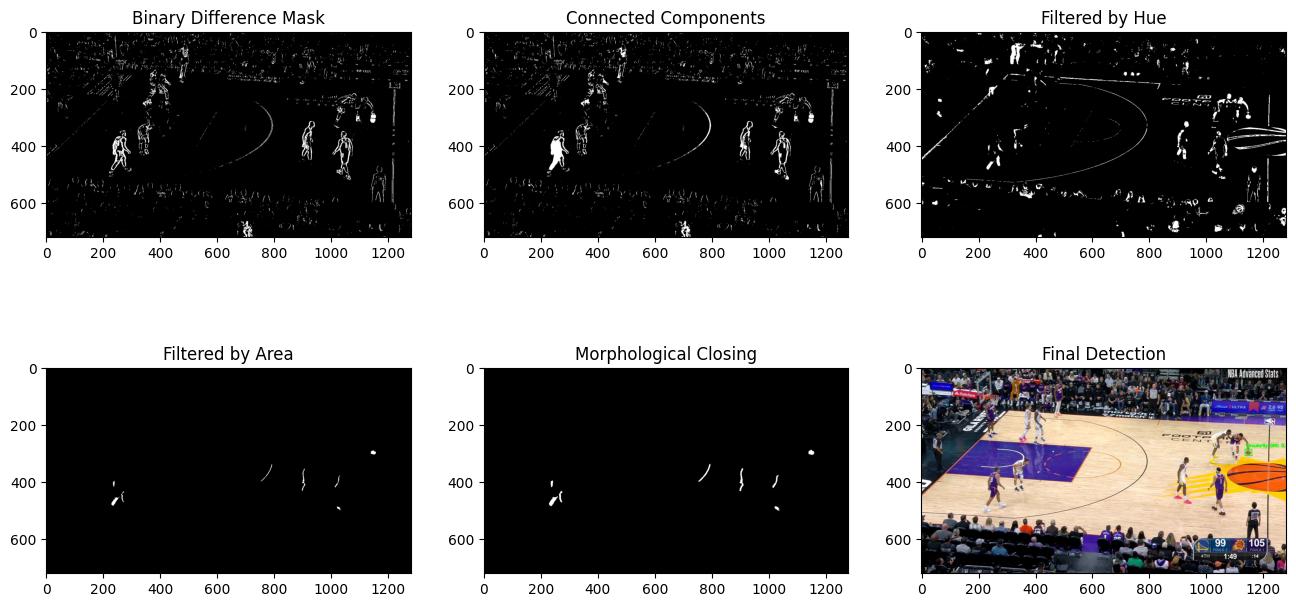

In [ ]:
import matplotlib.pyplot as plt

# Most recent working code, detect a basketball in frame1 given immediate frame2 after it (Dec 11)

def detect_basketball_with_visualization(frame1, frame2, min_area=50, visualize=False):
    # create binary difference image between frame1 and frame2
    diff = cv2.absdiff(frame1, frame2)
    gray_diff = cv2.cvtColor(diff, cv2.COLOR_BGR2GRAY)
    _, binary_diff = cv2.threshold(gray_diff, 30, 255, cv2.THRESH_BINARY)

    # cluster connected regions in the binary image
    contours, _ = cv2.findContours(binary_diff, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    clustered_mask = np.zeros_like(binary_diff)
    cv2.drawContours(clustered_mask, contours, -1, 255, -1)

    # filter by HSV color (H values up to 60 as the paper section 2.3 suggests)
    hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
    brown_mask = cv2.inRange(hsv, (0, 100, 20), (60, 255, 200))

    # combine with color mask
    combined_mask = cv2.bitwise_and(clustered_mask, brown_mask)

    # filter by area, min_area is parameterized since the ball may be larger or smaller based on camera angle (default 50px)
    area_filtered_mask = np.zeros_like(combined_mask)
    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # if the contour is large enough, keep it
    for contour in contours:
        area = cv2.contourArea(contour)
        if area >= min_area:
            cv2.drawContours(area_filtered_mask, [contour], -1, 255, -1)

    # use morphological closing to fill gaps in close-to-circle object (our innovation since we noticed struggled without it)
    kernel = np.ones((3, 3), np.uint8)
    dilated_mask = cv2.dilate(area_filtered_mask, kernel)
    closed_mask = cv2.morphologyEx(dilated_mask, cv2.MORPH_CLOSE, kernel)
    combined_mask = closed_mask

    # filter by circularity, circularity_diff closer to 0 means closer to a perfect circle
    circularity_filtered_mask = np.zeros_like(combined_mask)
    best_candidate = None
    best_circularity_diff = float('inf')

    contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        area = cv2.contourArea(contour)
        perimeter = cv2.arcLength(contour, True)
        if perimeter == 0:
            continue

        circularity = (4 * np.pi * area) / (perimeter ** 2)
        circularity_diff = abs(circularity - 1)

        if circularity_diff <= 0.3:  # could consider parameterizing this too
            # only keep close to circle for visualizing the best candidates
            cv2.drawContours(circularity_filtered_mask, [contour], -1, 255, -1)
            if circularity_diff < best_circularity_diff:
                best_circularity_diff = circularity_diff
                best_candidate = contour

    # final detection result on top of frame1
    result = frame1.copy()
    if best_candidate is not None:
        x, y, w, h = cv2.boundingRect(best_candidate)
        padding = 2
        cv2.rectangle(result,
                     (max(0, x - padding), max(0, y - padding)),
                     (min(result.shape[1], x + w + padding),
                      min(result.shape[0], y + h + padding)),
                     (0, 255, 0), 2)
        # also print the circularity difference under the detection
        cv2.putText(result, f"Circularity Diff: {best_circularity_diff:.2f}",
                    (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
    
    # if we want to visualize the intermediate steps, display in a grid 
    if visualize:
        plt.figure(figsize=(16, 8))
        plt.subplot(2, 3, 1)
        plt.imshow(binary_diff, cmap='gray')
        plt.title('Binary Difference Mask')
        plt.subplot(2, 3, 2)
        plt.imshow(clustered_mask, cmap='gray')
        plt.title('Connected Components')
        plt.subplot(2, 3, 3)
        plt.imshow(brown_mask, cmap='gray')
        plt.title('Filtered by Hue')
        plt.subplot(2, 3, 4)
        plt.imshow(area_filtered_mask, cmap='gray')
        plt.title('Filtered by Area')
        plt.subplot(2, 3, 5)
        plt.imshow(combined_mask, cmap='gray')
        plt.title('Morphological Closing')
        plt.subplot(2, 3, 6)
        plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
        plt.title('Final Detection')
        plt.show()

    return result

# example usage with an NBA clip (successful)
frame1_path = "data/Suns-Warriors-11-30-24-KD3Pt-frames/frame_0012.jpg"
frame1 = cv2.imread(frame1_path)
frame2_path = "data/Suns-Warriors-11-30-24-KD3Pt-frames/frame_0013.jpg"
frame2 = cv2.imread(frame2_path)

result = detect_basketball_with_visualization(frame1, frame2, visualize=True, min_area=50)


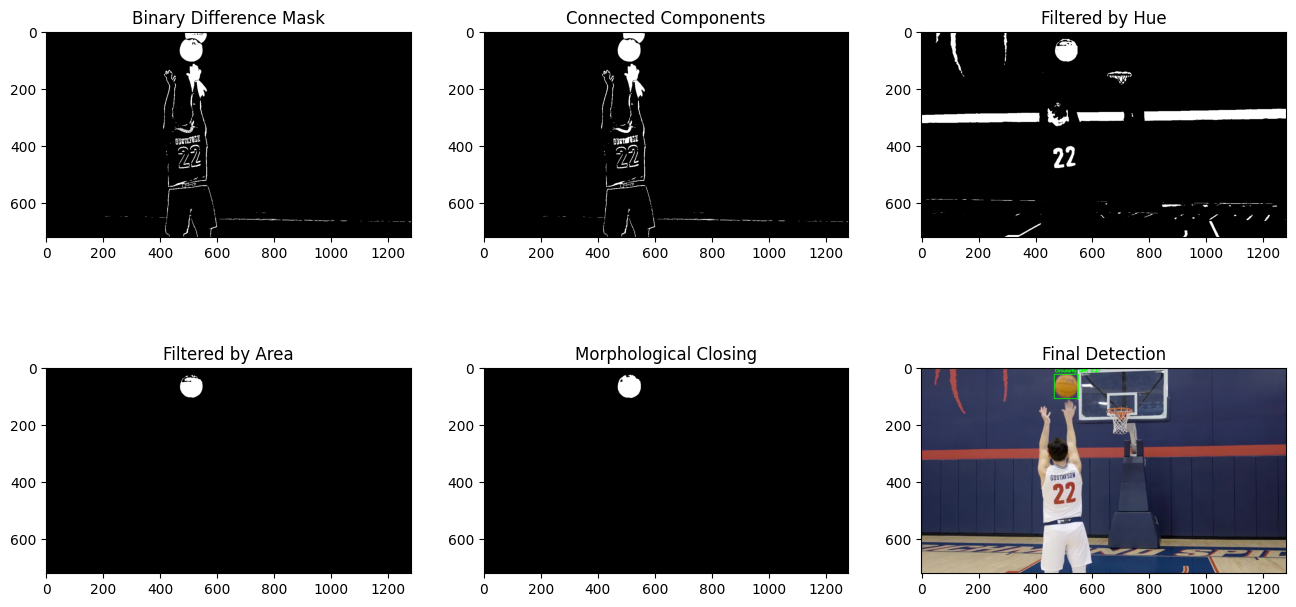

In [3]:
# Example usage with the simple free throw clip (successful)
frame1_ft_path = "data/basketball-free-throws-urichmond-frames/frame_0036.jpg"
frame1_ft = cv2.imread(frame1_ft_path)
frame2_ft_path = "data/basketball-free-throws-urichmond-frames/frame_0037.jpg"
frame2_ft = cv2.imread(frame2_ft_path)

result_ft = detect_basketball_with_visualization(frame1_ft, frame2_ft, min_area=200, visualize=True)

In [4]:
# TODO: Once more videos are processed and frames exist in /data, run the detection on them so we have examples of the detection 
# both successful and unsuccessful (we should try to get at least 5-10 of each, since we proposed 10 images from each person)

# can also save the final detection image using plt.savefig(<path>) once we get results too, but we can use the intermediate visualizations built into the function too

In [5]:
# Function that performs basketball detection on full set of frames in a folder, then saves to a video 
def process_frames_to_video(frames_dir, output_dir, output_name):
    # get list of frame paths
    frame_paths = sorted(Path(frames_dir).glob('*.jpg'))
    if len(frame_paths) == 0:
        raise ValueError(f"No frames found in directory: {frames_dir}")

    # load first frame to get dimensions
    frame = cv2.imread(str(frame_paths[0]))
    height, width, _ = frame.shape

    # initialize video writer (MP4 codec)
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    output_path = os.path.join(output_dir, output_name)
    out = cv2.VideoWriter(output_path, fourcc, 10, (width, height))

    for i in range(len(frame_paths) - 1):  # -1 because we need pairs of frames for the function to work
        frame1 = cv2.imread(str(frame_paths[i]))
        frame2 = cv2.imread(str(frame_paths[i + 1]))
        result = detect_basketball_with_visualization(frame1, frame2)
        out.write(result)

    out.release()
    print(f"Video saved to: {output_path}")

In [6]:
# working example on the free throw clip
ft_frames_dir = "data/basketball-free-throws-urichmond-frames/"
output_dir = "results/"
output_name = "basketball-free-throws-urichmond-detection.mp4"
process_frames_to_video(ft_frames_dir, output_dir, output_name)

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Video saved to: results/basketball-free-throws-urichmond-detection.mp4


In [8]:
# working example on the NBA clip (unsucessful because of false positives and overlapping contour with player/ball)
ft_frames_dir = "data/Suns-Warriors-11-30-24-KD3Pt-frames"
output_dir = "results/"
output_name = "Suns-Warriors-KD3Pt-detection.mp4"
process_frames_to_video(ft_frames_dir, output_dir, output_name)

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


Video saved to: results/Suns-Warriors-KD3Pt-detection.mp4


In [ ]:
# TODO: Try with NBA clip or other easier discovered videos from Elliot / Selina 

### Innovation: Trying Canny Edge
Because we struggled with detection when the ball and player are the same connected component, we attempted a revised algorithm innovating on the original by utilizing canny edge detection as the first filter step instead of motion difference from absolute diff



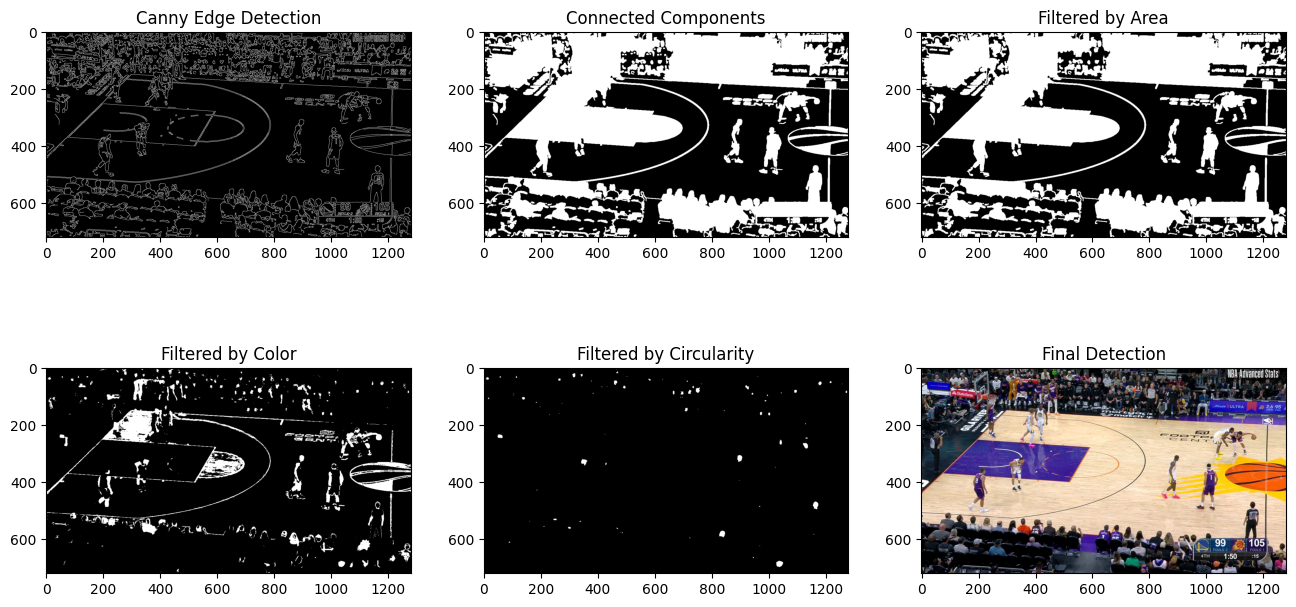

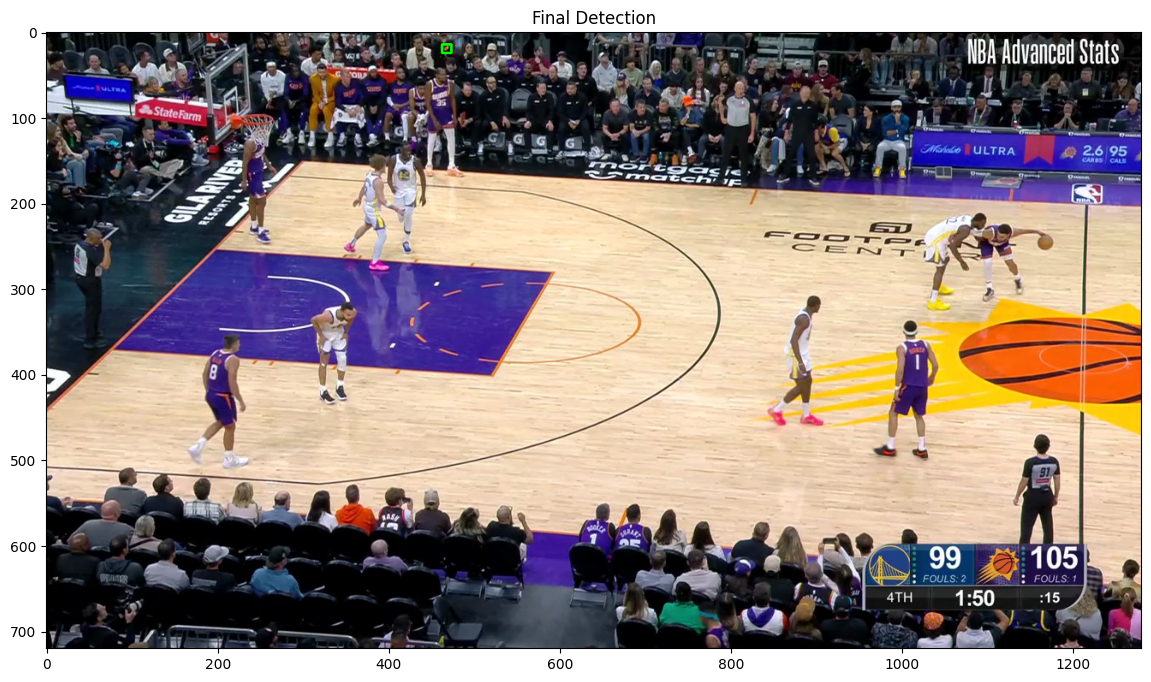

In [ ]:
# TODO: Finish writing a working version with canny edge detection + morphological closing to fill circle gaps 
# - copy updated hsv range from above 
# - try the kernelized operations to fill gaps in circle(s) detected and/or seperate overlapping contours and edges
# - get a version of this to work for some NBA images that don't work with the regular function, then we can justify it as an innovation

# def detect_basketball_canny(frame1, frame2):
#     # canny edge detection to frame1
#     gray = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
#     # gaussian blur to reduce noise
#     blurred = cv2.GaussianBlur(gray, (5, 5), 0)
#     # canny edge detection
#     edges = cv2.Canny(blurred, 50, 150)

#     plt.figure(figsize=(16, 8))
#     plt.subplot(2, 3, 1)
#     plt.imshow(edges, cmap='gray')
#     plt.title('Canny Edge Detection')

#     # cluster connected regions
#     # Apply dilation to connect nearby edges
#     kernel = np.ones((3,3), np.uint8)
#     dilated_edges = cv2.dilate(edges, kernel, iterations=1)
#     contours, _ = cv2.findContours(dilated_edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
#     clustered_mask = np.zeros_like(edges)
#     cv2.drawContours(clustered_mask, contours, -1, 255, -1)

#     plt.subplot(2, 3, 2)
#     plt.imshow(clustered_mask, cmap='gray')
#     plt.title('Connected Components')

#     # filter by area 
#     min_area = 50
#     area_filtered_mask = np.zeros_like(clustered_mask)
    
#     for contour in contours:
#         area = cv2.contourArea(contour)
#         if area >= min_area:
#             cv2.drawContours(area_filtered_mask, [contour], -1, 255, -1)

#     plt.subplot(2, 3, 3)
#     plt.imshow(area_filtered_mask, cmap='gray')
#     plt.title('Filtered by Area')

#     # filter by HSV color 
#     hsv = cv2.cvtColor(frame1, cv2.COLOR_BGR2HSV)
#     brown_mask = cv2.inRange(hsv, (0, 60, 60), (60, 255, 255))
#     combined_mask = cv2.bitwise_and(area_filtered_mask, brown_mask)

#     plt.subplot(2, 3, 4)
#     plt.imshow(combined_mask, cmap='gray')
#     plt.title('Filtered by Color')

#     # filter by circularity
#     circularity_filtered_mask = np.zeros_like(combined_mask)
#     best_candidate = None
#     best_circularity_diff = float('inf')

#     contours, _ = cv2.findContours(combined_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

#     for contour in contours:
#         area = cv2.contourArea(contour)
#         perimeter = cv2.arcLength(contour, True)
#         if perimeter == 0:
#             continue

#         circularity = (4 * np.pi * area) / (perimeter ** 2)
#         circularity_diff = abs(circularity - 1)
        
#         if circularity_diff <= 0.5:
#             cv2.drawContours(circularity_filtered_mask, [contour], -1, 255, -1)
#             if circularity_diff < best_circularity_diff:
#                 best_circularity_diff = circularity_diff
#                 best_candidate = contour

#     plt.subplot(2, 3, 5)
#     plt.imshow(circularity_filtered_mask, cmap='gray')
#     plt.title('Filtered by Circularity')

#     # final detection result
#     result = frame1.copy()  # Use frame1 since we're detecting in frame1
#     if best_candidate is not None:
#         x, y, w, h = cv2.boundingRect(best_candidate)
#         padding = 2
#         cv2.rectangle(result,
#                      (max(0, x - padding), max(0, y - padding)),
#                      (min(result.shape[1], x + w + padding),
#                       min(result.shape[0], y + h + padding)),
#                      (0, 255, 0), 2)

#     plt.subplot(2, 3, 6)
#     plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
#     plt.title('Final Detection')
#     return result, best_candidate


# frame1_path = "data/Suns-Warriors-11-30-24-KD3Pt-frames/frame_0001.jpg"
# frame1 = cv2.imread(frame1_path)
# frame2_path = "data/Suns-Warriors-11-30-24-KD3Pt-frames/frame_0005.jpg"
# frame2 = cv2.imread(frame2_path)

# result, _ = detect_basketball_with_visualization(frame1, frame2)
# plt.figure(figsize=(16, 8))
# plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
# plt.title('Final Detection')
# plt.show()
